In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [2]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
data = pd.read_csv(url, names=names)

In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
class       303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
 # Checking for any null values
data.isnull().values.any()

False

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [9]:
# remove missing data (indicated with a "?")
data_1 = data[~data.isin(['?'])]
data_1.loc[270:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
270,61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0,1
271,66.0,1.0,4.0,160.0,228.0,0.0,2.0,138.0,0.0,2.3,1.0,0.0,6.0,0
272,46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0,2
273,71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,2.0,0.0,3.0,0
274,59.0,1.0,1.0,134.0,204.0,0.0,0.0,162.0,0.0,0.8,1.0,2.0,3.0,1
275,64.0,1.0,1.0,170.0,227.0,0.0,2.0,155.0,0.0,0.6,2.0,0.0,7.0,0
276,66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0,0
277,39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1
279,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0


In [10]:
data = data_1.dropna(axis=0)
data.loc[270:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
270,61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0,1
271,66.0,1.0,4.0,160.0,228.0,0.0,2.0,138.0,0.0,2.3,1.0,0.0,6.0,0
272,46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0,2
273,71.0,0.0,4.0,112.0,149.0,0.0,0.0,125.0,0.0,1.6,2.0,0.0,3.0,0
274,59.0,1.0,1.0,134.0,204.0,0.0,0.0,162.0,0.0,0.8,1.0,2.0,3.0,1
275,64.0,1.0,1.0,170.0,227.0,0.0,2.0,155.0,0.0,0.6,2.0,0.0,7.0,0
276,66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0,0
277,39.0,0.0,3.0,138.0,220.0,0.0,0.0,152.0,0.0,0.0,2.0,0.0,3.0,0
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1
279,58.0,0.0,4.0,130.0,197.0,0.0,0.0,131.0,0.0,0.6,2.0,0.0,3.0,0


In [11]:
data.shape

(297, 14)

In [12]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object

In [13]:
# Transform data to numeric

In [14]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [16]:
data[data['class']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
age,160.0,52.64375,9.551151,29.0,44.75,52.0,59.00,76.0
sex,160.0,0.55625,0.498386,0.0,0.00,1.0,1.00,1.0
cp,160.0,2.79375,0.925508,1.0,2.00,3.0,3.00,4.0
trestbps,160.0,129.17500,16.373990,94.0,120.00,130.0,140.00,180.0
chol,160.0,243.49375,53.757550,126.0,208.75,235.5,268.25,564.0
fbs,160.0,0.14375,0.351938,0.0,0.00,0.0,0.00,1.0
restecg,160.0,0.84375,0.987640,0.0,0.00,0.0,2.00,2.0
thalach,160.0,158.58125,19.043304,96.0,149.00,161.0,172.00,202.0
exang,160.0,0.14375,0.351938,0.0,0.00,0.0,0.00,1.0
oldpeak,160.0,0.59875,0.787160,0.0,0.00,0.2,1.10,4.2


In [17]:
data[data['class']==4].describe().T

,count,mean,std,min,25%,50%,75%,max
age,13.0,59.692308,9.419701,38.0,57.0,60.0,64.0,77.0
sex,13.0,0.846154,0.375534,0.0,1.0,1.0,1.0,1.0
cp,13.0,3.692308,0.854850,1.0,4.0,4.0,4.0,4.0
trestbps,13.0,138.769231,17.186011,112.0,125.0,145.0,150.0,165.0
chol,13.0,253.384615,66.287931,166.0,212.0,231.0,289.0,407.0
fbs,13.0,0.076923,0.277350,0.0,0.0,0.0,0.0,1.0
restecg,13.0,1.615385,0.767948,0.0,2.0,2.0,2.0,2.0
thalach,13.0,140.615385,19.881057,114.0,125.0,132.0,154.0,182.0
exang,13.0,0.461538,0.518875,0.0,0.0,0.0,1.0,1.0
oldpeak,13.0,2.361538,1.367198,0.0,1.0,2.5,3.6,4.4


In [18]:
data['class'].value_counts()

0    160
1     54
3     35
2     35
4     13
Name: class, dtype: int64

In [19]:
# Exploratory data analysis

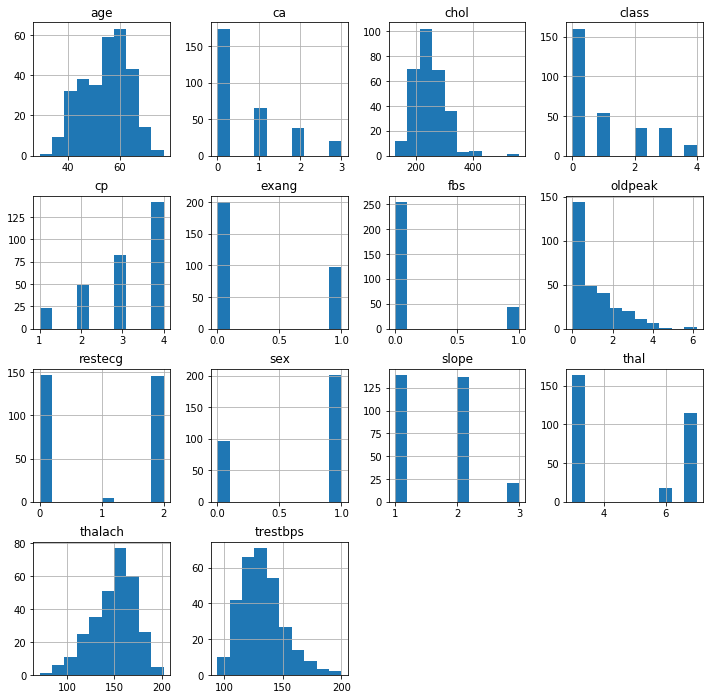

In [20]:
data.hist(figsize=(12,12))
plt.show()

In [21]:
#The class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). 
#So, we will need to convert our class data to categorical labels. 
#For example, the label 2 will become [0, 0, 1, 0, 0].

In [22]:
#Let's check the distribution and outliers for each column in the data

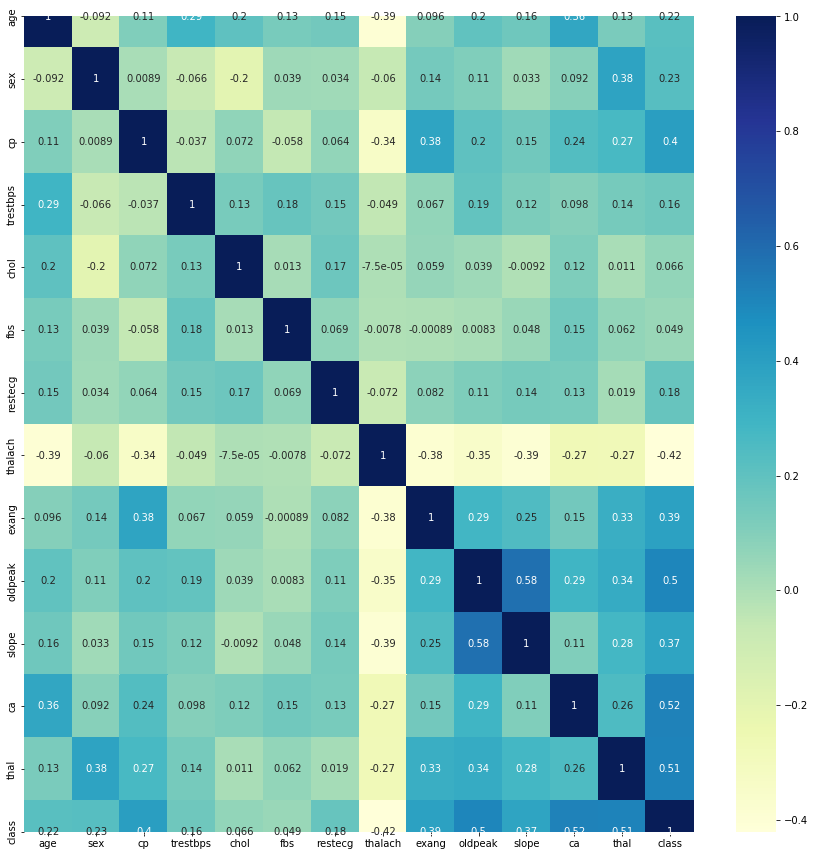

In [23]:
#Checking correlation between differnet variable and class with heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

Based on the heatmap, there is positive correlation between 
(1) oldpeak and class (ST depression induced by exercise relative to rest and heart disease)
(2) slope and class (the slope of the peak exercise ST segment and heart disease)
(3) chest pain and class (presence of chest pain and heart disease) and
(4) exang and class (exercise induced angina and heart disease).

Drop class column to create training and testing data set

In [24]:
features= data.drop(['class'] , axis =1)
features.shape

(297, 13)

In [25]:
target=data[['class']]
target.shape
#ind_vars = df.drop(["Price", "price_log"], axis = 1)
#dep_var = df[["price_log", "Price"]]

(297, 1)

In [26]:
target['class'].value_counts()

0    160
1     54
3     35
2     35
4     13
Name: class, dtype: int64

In [27]:
#one-hot-encoding

ohe_data = pd.get_dummies(target, columns = ['class'])
print(ohe_data)

     class_0  class_1  class_2  class_3  class_4
0          1        0        0        0        0
1          0        0        1        0        0
2          0        1        0        0        0
3          1        0        0        0        0
4          1        0        0        0        0
..       ...      ...      ...      ...      ...
297        0        1        0        0        0
298        0        1        0        0        0
299        0        0        1        0        0
300        0        0        0        1        0
301        0        1        0        0        0

[297 rows x 5 columns]


In [28]:
ohe_data.dtypes

class_0    uint8
class_1    uint8
class_2    uint8
class_3    uint8
class_4    uint8
dtype: object

In [29]:
features=features
prediction=ohe_data

Splitting the dataset in to train tand test
(we will scale the data set after splitting it to avoid data leakage)

In [109]:
X_train, x_test, Y_train, y_test= train_test_split(features, prediction, test_size=0.2, random_state=42, stratify=prediction)

In [31]:
print('old output: before 5:43 pm')
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

old output: before 5:43 pm
(237, 13)
(237, 5)
(60, 13)
(60, 5)


In [32]:
print('new output: after 5:43 pm')
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

new output: after 5:43 pm
(237, 13)
(237, 5)
(60, 13)
(60, 5)


In [33]:
print('new output: after 6:21 pm, after introducing stratification')
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)

new output: after 6:21 pm, after introducing stratification
(237, 13)
(237, 5)
(60, 13)
(60, 5)


Scaling the data 

In [34]:
#scaler=MinMaxScaler()
scaler=StandardScaler()

In [35]:
#Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized=scaler.fit_transform(X_train)
x_test_normalized=scaler.fit_transform(x_test)

In [36]:
print(type(X_train_normalized))
print(X_train_normalized.shape)

<class 'numpy.ndarray'>
(237, 13)


In [37]:
print(type(Y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


We will conver data frame to numpy array 

In [38]:
Y_train_1 = Y_train.to_numpy()
print(Y_train_1.shape)
print(type(Y_train_1))

(237, 5)
<class 'numpy.ndarray'>


In [39]:
y_test_1 = y_test.to_numpy()
print(y_test_1.shape)
print(type(y_test_1))

(60, 5)
<class 'numpy.ndarray'>


#First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results everytime we run the code.

In [40]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

Build the first model

In [41]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(13,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer 
model_1.add(Dense(5, activation='softmax'))

Compiling the model

In [42]:
model_1.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 10,373
Trainable params: 10,373
Non-trainable params: 0
_________________________________________________________________


In [43]:
print(X_train_normalized.shape)
print(Y_train_1.shape)

(237, 13)
(237, 5)


In [44]:
# train the model while keeping 10% data for validation
history_1=model_1.fit(X_train_normalized, Y_train_1,validation_split=0.1, epochs=30, batch_size=10, verbose = 1)

Train on 213 samples, validate on 24 samples
Epoch 1/30
213/213 [==============================] - 1s 3ms/sample - loss: 1.3441 - accuracy: 0.5023 - val_loss: 0.7832 - val_accuracy: 0.8750
Epoch 2/30
213/213 [==============================] - 0s 254us/sample - loss: 1.0849 - accuracy: 0.5681 - val_loss: 0.6010 - val_accuracy: 0.9167
Epoch 3/30
213/213 [==============================] - 0s 250us/sample - loss: 0.9996 - accuracy: 0.5869 - val_loss: 0.6076 - val_accuracy: 0.8750
Epoch 4/30
213/213 [==============================] - 0s 257us/sample - loss: 0.9010 - accuracy: 0.6432 - val_loss: 0.6111 - val_accuracy: 0.8750
Epoch 5/30
213/213 [==============================] - 0s 255us/sample - loss: 0.8626 - accuracy: 0.6432 - val_loss: 0.6202 - val_accuracy: 0.8333
Epoch 6/30
213/213 [==============================] - 0s 246us/sample - loss: 0.8448 - accuracy: 0.6620 - val_loss: 0.6342 - val_accuracy: 0.7917
Epoch 7/30
213/213 [==============================] - 0s 237us/sample - loss: 0.8

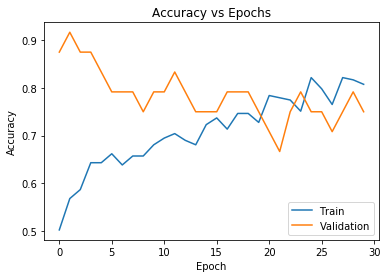

In [45]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [46]:
model_1.evaluate(x_test_normalized, y_test_1, verbose = 1)
test_pred = np.round(model_1.predict(x_test_normalized))

60/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [56]:
from sklearn.metrics import confusion_matrix
#prediction
pred=model_1.predict(x_test_normalized)
pred= np.argmax(pred,axis=1)
y_true=np.argmax(y_test_1, axis=1)

In [48]:
pred

array([1, 0, 2, 3, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 3, 0, 2, 0, 1, 2, 1, 0, 3, 1, 4, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       3, 3, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0])

In [57]:
y_true

array([1, 4, 3, 3, 2, 4, 0, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 2, 1, 0, 2, 0, 4, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 3, 0, 3, 0, 1, 1, 0, 0, 2, 0, 0, 0, 3, 3, 0])

In [58]:
cnf_matrix=confusion_matrix(y_true, pred)

In [61]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[26  3  1  2  0]
 [ 3  5  2  1  0]
 [ 1  3  1  1  1]
 [ 1  1  3  2  0]
 [ 1  1  1  0  0]]


In [65]:
accuracy_score(y_true,pred)

0.5666666666666667

Binary classification: We will simplyfy the problem by changing it to heart disease and no heart disease

In [154]:
y_train_bin_1=Y_train.copy()
y_test_bin=y_test.copy()

In [155]:
y_train_bin_1.head(3)

,class_0,class_1,class_2,class_3,class_4
249,1,0,0,0,0
209,0,1,0,0,0
236,0,0,1,0,0


In [156]:
y_train_bin_1['target'] = np.where(y_train_bin_1['class_0'] == 1, 0, 1)
y_test_bin['target'] = np.where(y_test_bin['class_0'] == 1, 0, 1)

In [157]:
y_train_bin_1 = y_train_bin_1[['target']]
y_test_bin = y_test_bin[['target']]

In [158]:
print(y_train_bin_1.shape)
print(y_test_bin.shape)

(237, 1)
(60, 1)


In [121]:
# We will be adding the layers sequentially
model_2 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_2.add(Dense(128, activation='relu', input_shape=(13,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_2.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of heart failure diagnosis 
model_2.add(Dense(1, activation='sigmoid'))


In [122]:
# Now we need to compile the model. Since this is binary classification, we can choose one optimizer out of 
# 1. SGD 2. RMSprop 3. Adam 4. Adadelta 5. Adagrad 6. Adamax 7. Nadam 8. Ftrl

# For now, let's try adamax optimizer with accuracy as the metric and see the model's summary.

model_2.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1792      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [159]:
type(y_train_bin_1)

pandas.core.frame.DataFrame

In [160]:
y_train_bin = y_train_bin_1.to_numpy()

In [130]:
y_test_bin= y_test_bin.to_numpy()

In [128]:
# let's train the model while keeping 10% data for validation.

history_2 = model_2.fit(X_train_normalized, 
                    y_train_bin,
                    validation_split=0.1, 
                    epochs=60,
                    verbose=2)

Train on 213 samples, validate on 24 samples
Epoch 1/60
213/213 - 1s - loss: 0.6076 - accuracy: 0.6854 - val_loss: 0.5528 - val_accuracy: 0.7083
Epoch 2/60
213/213 - 0s - loss: 0.4795 - accuracy: 0.8122 - val_loss: 0.4971 - val_accuracy: 0.7917
Epoch 3/60
213/213 - 0s - loss: 0.4157 - accuracy: 0.8404 - val_loss: 0.4523 - val_accuracy: 0.7917
Epoch 4/60
213/213 - 0s - loss: 0.3712 - accuracy: 0.8592 - val_loss: 0.4173 - val_accuracy: 0.8333
Epoch 5/60
213/213 - 0s - loss: 0.3431 - accuracy: 0.8545 - val_loss: 0.4039 - val_accuracy: 0.8333
Epoch 6/60
213/213 - 0s - loss: 0.3434 - accuracy: 0.8498 - val_loss: 0.4096 - val_accuracy: 0.8333
Epoch 7/60
213/213 - 0s - loss: 0.3283 - accuracy: 0.8498 - val_loss: 0.4071 - val_accuracy: 0.8333
Epoch 8/60
213/213 - 0s - loss: 0.3010 - accuracy: 0.8732 - val_loss: 0.4174 - val_accuracy: 0.8333
Epoch 9/60
213/213 - 0s - loss: 0.3130 - accuracy: 0.8545 - val_loss: 0.4434 - val_accuracy: 0.8333
Epoch 10/60
213/213 - 0s - loss: 0.2956 - accuracy: 0.8

In [151]:
model_2.evaluate(x_test_normalized, y_test_bin, verbose = 1)
test_pred_2 = np.round(model_2.predict(x_test_normalized))

60/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



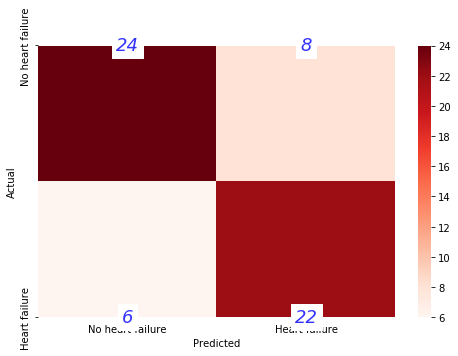

In [186]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_bin, test_pred_2))
cm = confusion_matrix(y_test_bin, test_pred_2)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='.0f',xticklabels=['No heart failure', 'Heart failure'], yticklabels=['No heart failure', 'Heart failure'], 
            cmap='Reds',
           annot_kws={'fontsize': 18, 'fontstyle': 'italic', 'color':'blue', 'alpha': 0.8,
                       'rotation': 'horizontal', 'verticalalignment': 'center', 'backgroundcolor': 'w'})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [143]:
cnf_matrix=confusion_matrix(y_test_bin, test_pred)

In [144]:
print(cnf_matrix)

[[24  8]
 [ 6 22]]


In [145]:
accuracy_score(y_test_bin, test_pred)

0.7666666666666667

Accuracy score for categorical model was around 0.57. Accuracy score improved to 0.77 after converting the model to biary classification.